<a href="https://colab.research.google.com/github/mahmoud2571587/House_price_prediction/blob/master/House_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [507]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy as stats

import dataset

In [508]:
train = pd.read_csv('/content/drive/My Drive/Kaggle/House_price/train.csv')
test  = pd.read_csv('/content/drive/My Drive/Kaggle/House_price/test.csv')

#Explore Data STEP

In [509]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [510]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [511]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [512]:
corr= train.corr()['SalePrice'].sort_values(ascending=False)
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Explore Missing_values

In [513]:
def missing_val(df):
  miss=df.isnull().sum().sort_values(ascending=False) 
  total_miss = miss[miss != 0]
  percent = round(total_miss / len(df)*100,2)
  return pd.concat((total_miss , percent) , axis=1 , keys=['Total Miss' , 'Percentage'])

In [514]:
missing_val(train)

,Total Miss,Percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


In [515]:
missing_val(test)

,Total Miss,Percentage
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


Explore y ['SalePrice']

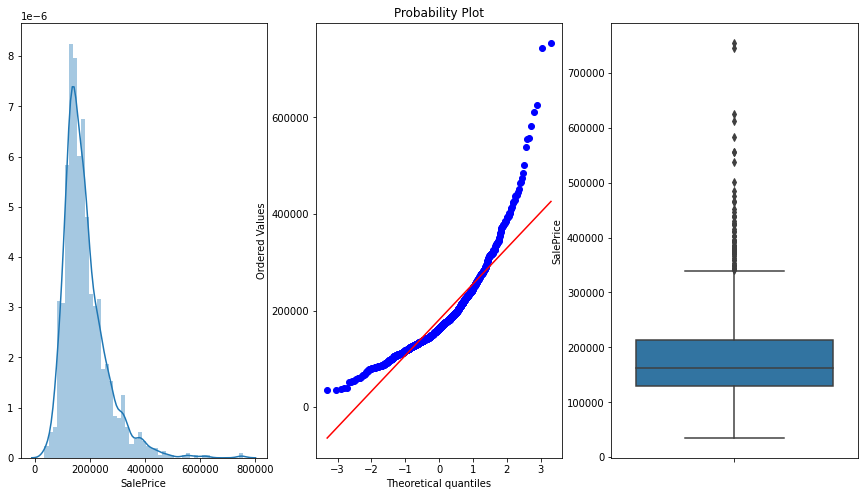

In [516]:
figure = plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.distplot(train['SalePrice'])

from scipy import stats
plt.subplot(1,3,2)
stats.probplot(train['SalePrice'] , plot=plt)

plt.subplot(1,3,3)
sns.boxplot(train['SalePrice'] ,orient='v')

In [517]:
print('Skewness of Saleprice is :-   ' , train['SalePrice'].skew()) 
print('kurtoises of Saleprice is :   ' , train['SalePrice'].kurt())

Skewness of Saleprice is :-    1.8828757597682129
kurtoises of Saleprice is :    6.536281860064529


Manage Skewness of Saleprice 

In [518]:
train['SalePrice'] = np.log1p(train['SalePrice'])

print('Skewness of Saleprice is :-   ' , train['SalePrice'].skew()) 
print('kurtoises of Saleprice is :   ' , train['SalePrice'].kurt())

Skewness of Saleprice is :-    0.12134661989685333
kurtoises of Saleprice is :    0.809519155707878


visualize Saleprice after log tranformation

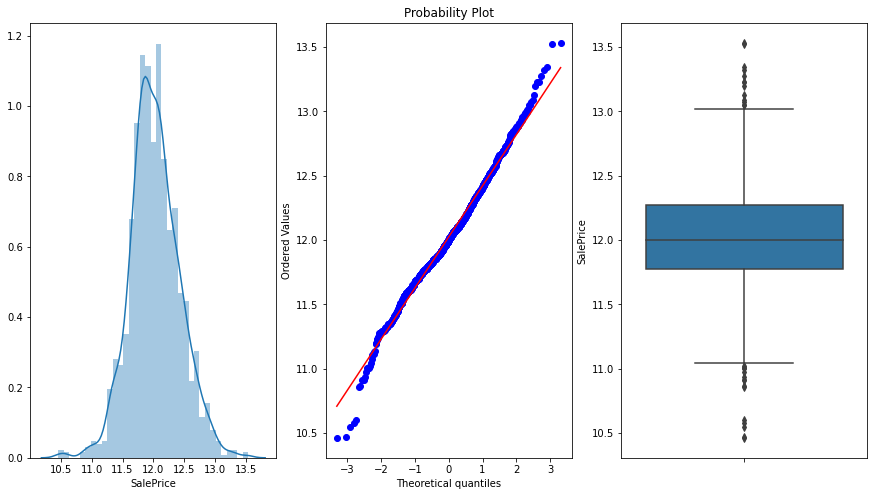

In [519]:
fg = plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.distplot(train['SalePrice'])


plt.subplot(1,3,2)
stats.probplot(train['SalePrice'] , plot=plt)

plt.subplot(1,3,3)
sns.boxplot(train['SalePrice'], orient='v')

using heatmap to show correlation between features

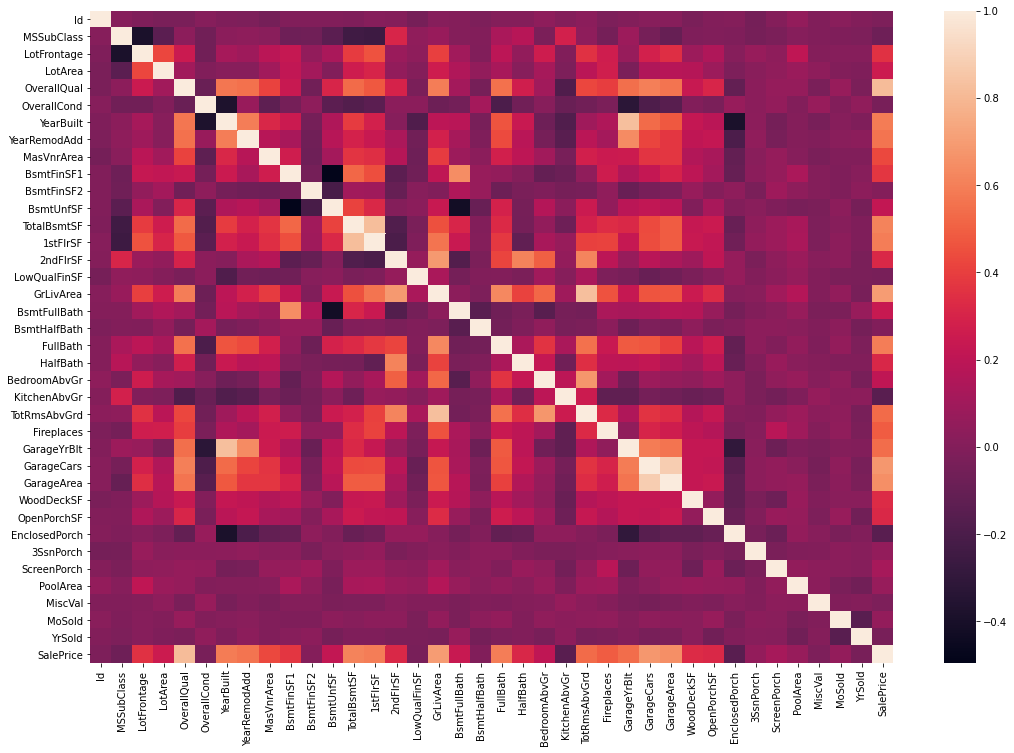

In [520]:
fg = plt.figure(figsize=(18,12))
sns.heatmap(train.corr())

In [521]:
# EXplore correlation between features
corr = train.corr()['SalePrice'].sort_values(ascending =False)[:10]
print(corr)

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePrice, dtype: float64


visualize features that has strong correlation with SalePrice

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']


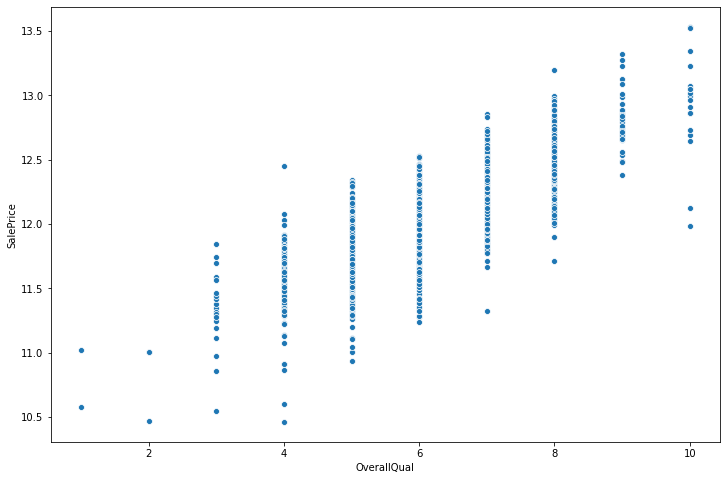

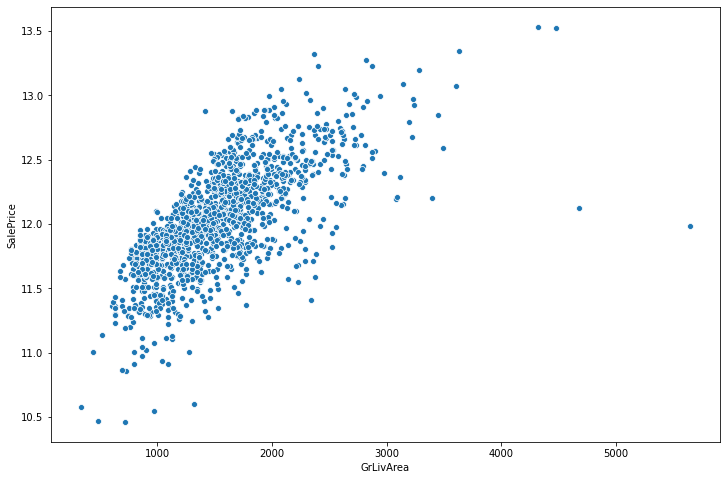

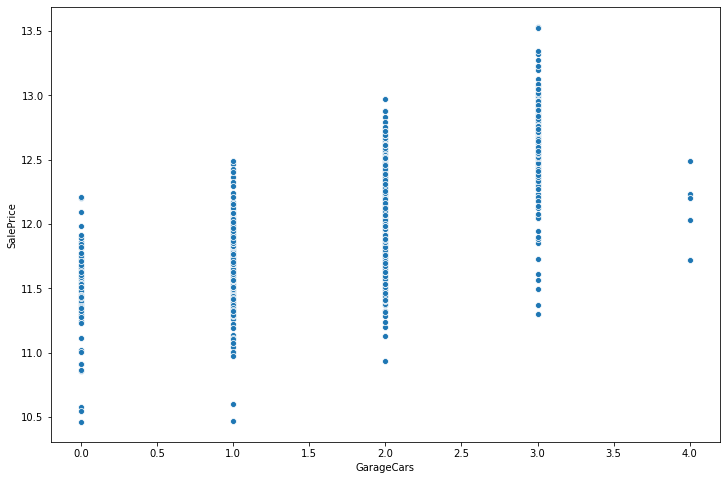

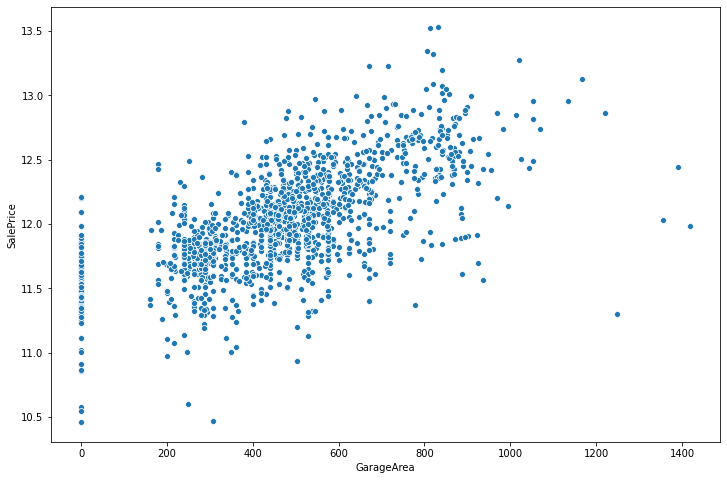

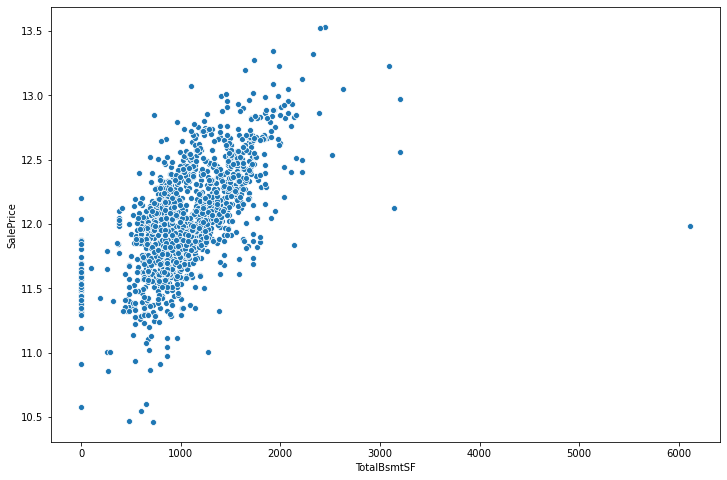

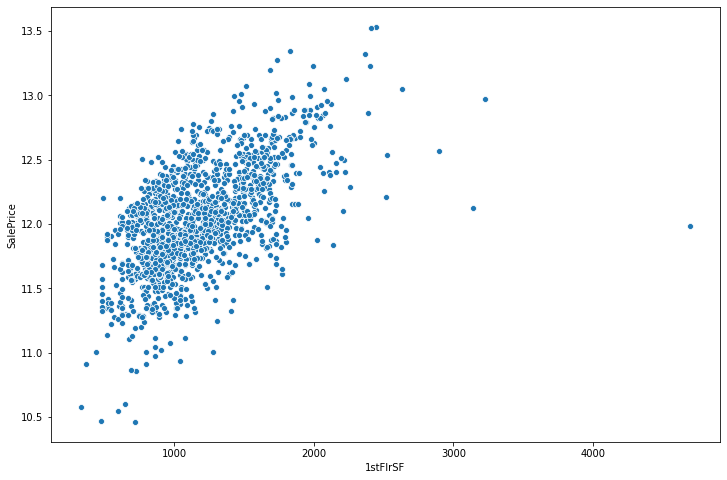

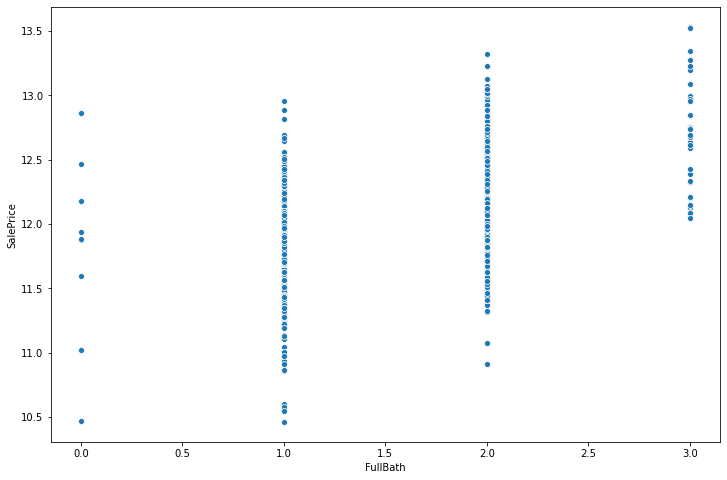

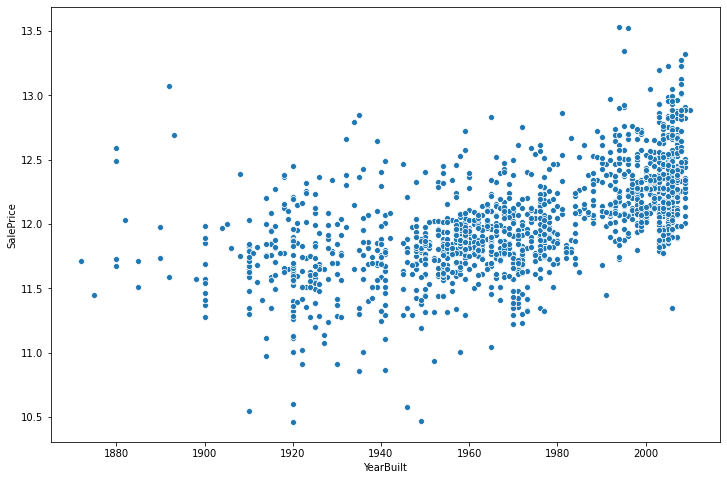

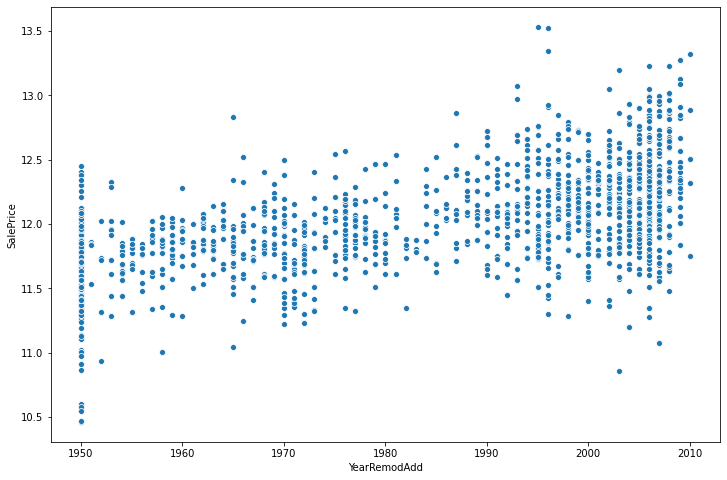

In [522]:
st_corr=['OverallQual' , 'GrLivArea' ,'GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt','YearRemodAdd']
print(st_corr)
for i in st_corr:
  plt.subplots(figsize=(12,8))
  sns.scatterplot(x = train[i] , y=train['SalePrice'])
#sns.scatterplot(x = train['OverallQual'] , y=train['SalePrice'])

#Preprocessing Step

process outlier

In [523]:
numeric_data = train.select_dtypes(include = np.number).drop(['SalePrice'] , axis =1)
items = numeric_data.loc[ : , ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF',
                              'FullBath','YearBuilt','YearRemodAdd'  ]]

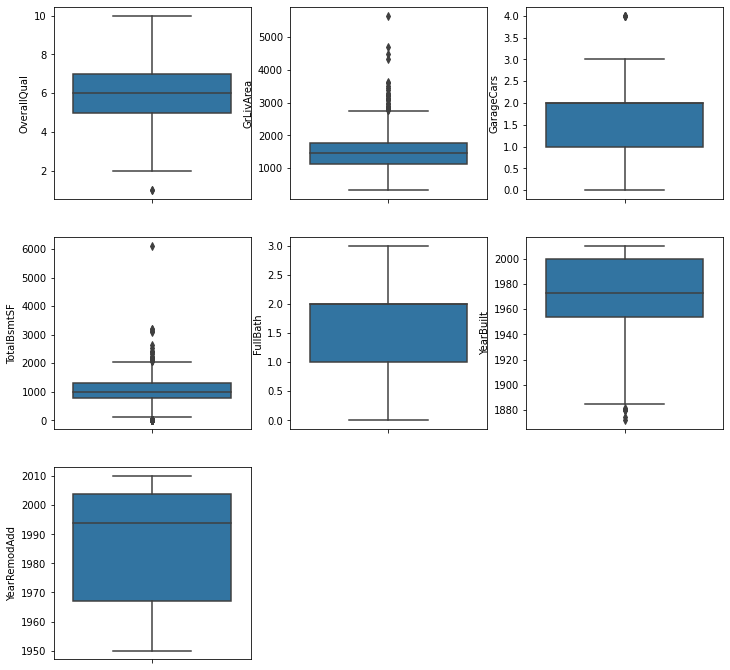

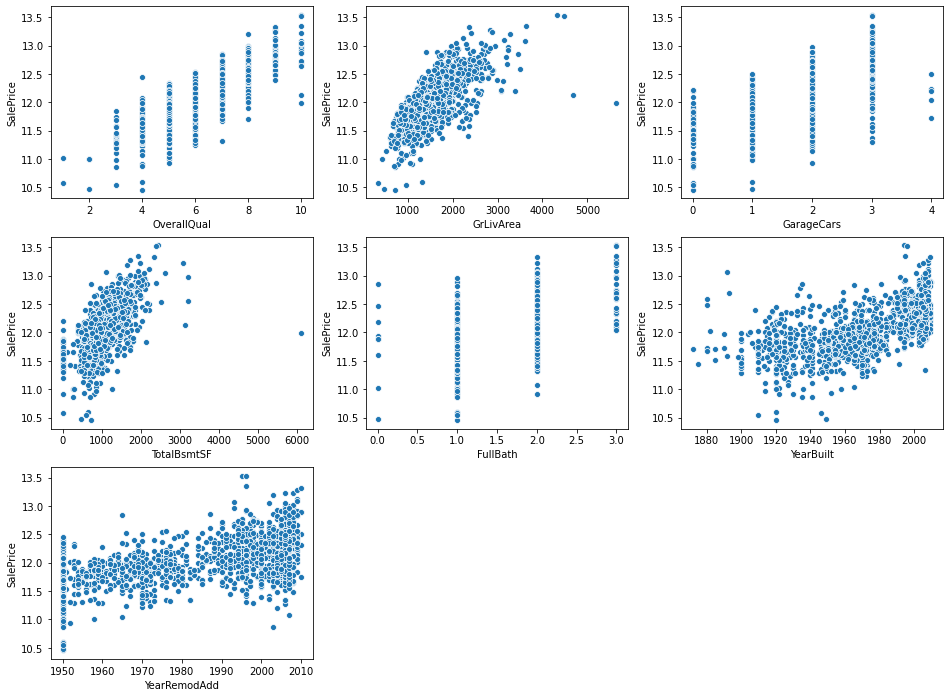

In [524]:
 #visualize these itemes using Boxplot
fig = plt.figure(figsize=(12,12))
for col in range(len(items.columns)) : 
    fig.add_subplot(3 , 3 , col+1)
    sns.boxplot(y=items.iloc[: , col])
plt.show()

    # Visualize these items using multivariate analysis (SCatter plot)   
fig = plt.figure(figsize=(16,12))
for col in range(len(items.columns)):
    fig.add_subplot(3,3,col+1)
    sns.scatterplot(items.iloc[ : , col] , train['SalePrice'])
plt.show()

In [525]:
  # Using Z-Score to identify outliers
from scipy import stats
z= np.abs(stats.zscore(items))
print(z)
threshold = 4
print(np.where(z > threshold))
    # Remove outlier using z-score
train.shape
train = train[(z < threshold).all(axis=1)]
train.shape

[[0.65147924 0.37033344 0.31172464 ... 0.78974052 1.05099379 0.87866809]
 [0.07183611 0.48251191 0.31172464 ... 0.78974052 0.15673371 0.42957697]
 [0.65147924 0.51501256 0.31172464 ... 0.78974052 0.9847523  0.83021457]
 ...
 [0.65147924 1.56964722 1.02685765 ... 0.78974052 1.00249232 1.02402865]
 [0.79515147 0.83278768 1.02685765 ... 1.02604084 0.70440562 0.53949344]
 [0.79515147 0.49393395 1.02685765 ... 1.02604084 0.20759447 0.96256569]]
(array([ 332,  440,  496,  523,  523,  691, 1169, 1182, 1298, 1298]), array([3, 3, 3, 1, 3, 1, 1, 1, 1, 3]))


(1452, 81)

check on correlation after remove outliers 


In [526]:
train.corr()['SalePrice'].sort_values(ascending=False)[:10]    # note that correlation of thesee features still strong

SalePrice       1.000000
OverallQual     0.816638
GrLivArea       0.714428
GarageCars      0.679579
GarageArea      0.655178
TotalBsmtSF     0.637401
1stFlrSF        0.607897
YearBuilt       0.588936
FullBath        0.586823
YearRemodAdd    0.569890
Name: SalePrice, dtype: float64

#process Missing Values

merge train and test data 

In [527]:
dataset = pd.concat((train,test) , sort = False).reset_index(drop=True)
dataset = dataset.drop(columns =['SalePrice'] , axis =1 )

In [528]:
missing_val(dataset)

,Total Miss,Percentage
PoolQC,2903,99.73
MiscFeature,2806,96.39
Alley,2713,93.20
Fence,2341,80.42
FireplaceQu,1420,48.78
LotFrontage,485,16.66
GarageCond,159,5.46
GarageQual,159,5.46
GarageYrBlt,159,5.46
GarageFinish,159,5.46


drop Features

In [529]:
missing_val(dataset)

,Total Miss,Percentage
PoolQC,2903,99.73
MiscFeature,2806,96.39
Alley,2713,93.20
Fence,2341,80.42
FireplaceQu,1420,48.78
LotFrontage,485,16.66
GarageCond,159,5.46
GarageQual,159,5.46
GarageYrBlt,159,5.46
GarageFinish,159,5.46


In [530]:
dataset['totalSF'] =( dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']  )
dataset['total_bathrooms'] = (dataset['BsmtFullBath'] + 0.5*dataset['BsmtHalfBath'] + dataset['FullBath'] + 0.5*dataset['HalfBath'])
dataset['ageHouse'] = (dataset['YrSold'] - dataset['YearBuilt'] )


In [531]:
dataset.drop(['Id','Utilities','PoolQC','MiscFeature','Alley','Fence','GarageYrBlt'] , axis=1 , inplace=True)
dataset.drop(['TotalBsmtSF' , '1stFlrSF' ,'2ndFlrSF'] , axis = 1 , inplace =True)
dataset.drop(['BsmtFullBath' , 'BsmtHalfBath' , 'FullBath' , 'HalfBath'] , axis=1 , inplace=True)


#Fill Missing Values

In [532]:
miss_mode =  ['MasVnrArea' , 'Electrical' , 'MSZoning' , 'SaleType','Exterior1st','Exterior2nd','KitchenQual']
for col in miss_mode:
    dataset[col]  = dataset[col].fillna(dataset[col].mode()[0])
    
missing_feat = ['GarageType','GarageCond','GarageQual','GarageFinish',
                'BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual',
                'FireplaceQu','MasVnrType']
for col in missing_feat:
    dataset[col]=dataset[col].fillna('None')

dataset['Functional'] = dataset['Functional'].fillna('Typ')
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

miss_zero = ['total_bathrooms','totalSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageArea','GarageCars' ]
for col in miss_zero:
    dataset[col] = dataset[col].fillna(0)


#check on misssing values
missing_val(dataset)

,Total Miss,Percentage


In [533]:
dataset.shape

(2911, 69)

In [534]:
dataset.dropna(inplace=True)

In [535]:
dataset.shape

(2911, 69)

In [536]:
missing_val(dataset)

,Total Miss,Percentage


Feature Engineering

edit skewness for some features

In [537]:
dataset['totalSF'].describe().T

count     2911.000000
mean      2535.105462
std        766.092603
min          0.000000
25%       1999.500000
50%       2446.000000
75%       2988.000000
max      10190.000000
Name: totalSF, dtype: float64

In [538]:
dataset['ageHouse'].describe().T

count    2911.000000
mean       36.560632
std        30.337217
min        -1.000000
25%         7.000000
50%        35.000000
75%        55.000000
max       136.000000
Name: ageHouse, dtype: float64

we notice that min for ageHouse is -1 and this ubnormal

In [539]:
neg_value = dataset[dataset['ageHouse'] < 0 ]
neg_value

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,totalSF,total_bathrooms,ageHouse
2541,20,RL,128.0,39290,Pave,IR1,Bnk,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,GasA,Ex,Y,SBrkr,0,5095,2,1,Ex,15,Typ,2,Gd,Attchd,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,17000,10,2007,New,Partial,10190.0,4.0,-1


this house YearRmdAdd in 2009    sold in 2007   build in 2008
so we will make yearSold in 2009 to make it sense

In [540]:
dataset.loc[dataset['YrSold'] < dataset['YearBuilt'], 'YrSold'] = 2009
dataset['ageHouse'] = (dataset['YrSold'] - dataset['YearBuilt'] )
dataset['ageHouse'].describe()

count    2911.000000
mean       36.561319
std        30.336389
min         0.000000
25%         7.000000
50%        35.000000
75%        55.000000
max       136.000000
Name: ageHouse, dtype: float64

change type of some features

In [541]:
dataset['MSSubClass']   = dataset['MSSubClass'].astype(str)


In [542]:
#check for duplicate rows 
duplicate= train[train.duplicated()]
print(duplicate) # there is no duplicate rows
dataset.shape

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]


(2911, 69)

process Categorical Data

In [543]:
final_features = pd.get_dummies(dataset).reset_index(drop=True)
print(final_features.shape)
final_features.head()

(2911, 292)


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,totalSF,total_bathrooms,ageHouse,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,0,1710,3,1,8,0,2.0,548.0,0,61,0,0,0,0,0,2,2008,2566.0,3.5,5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,0,1262,3,1,6,1,2.0,460.0,298,0,0,0,0,0,0,5,2007,2524.0,2.5,31,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,0,1786,3,1,6,1,2.0,608.0,0,42,0,0,0,0,0,9,2008,2706.0,3.5,7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,0,1717,3,1,7,1,3.0,642.0,0,35,272,0,0,0,0,2,2006,2473.0,2.0,91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,0,2198,4,1,9,1,3.0,836.0,192,84,0,0,0,0,0,12,2008,3343.0,3.5,8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [544]:
final_features =final_features.loc[:,~final_features.columns.duplicated()]

In [545]:
final_features.shape

(2911, 292)

In [546]:
y= train['SalePrice']
X = final_features.iloc[: len(y) , :]
df_test  = final_features.iloc[len(y): , :]

#Scaling Features

In [547]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X = sc_x.fit_transform(X)
y = sc_y.fit_transform(np.array(y).reshape(-1,1))

unsing Simple linear model 

In [548]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X , y)
y_pred = lr.predict(df_test)
print(y_pred)

[[-6.94914094e+14]
 [-7.44666741e+14]
 [-7.32944431e+14]
 ...
 [-7.30277934e+14]
 [-6.90157442e+14]
 [-7.59592970e+14]]


using cross validation

In [549]:
from sklearn.model_selection import KFold , cross_val_score
#lr = LinearRegression()
cv = KFold(shuffle= True , random_state=2 , n_splits=10)
scores = cross_val_score(lr , X , y , cv =cv ,scoring = 'neg_mean_absolute_error' )
print(scores.mean())

-190257288588.82657


using Ridg

In [550]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
ridge = Ridge(alpha = 400)
ridge.fit(X , y)
test_pred = ridge.predict(df_test)
print(test_pred)

[[1035.44078849]
 [1308.63721475]
 [1312.60365299]
 ...
 [1560.32568601]
 [ 962.37131058]
 [1230.81878229]]


Save model 

In [551]:
import pickle
filename = 'Ridge_model.pkl'
pickle.dump(ridge , open(filename , 'wb') )

make submission for Ridge_model

In [552]:
## create simple submission file 
pred = pd.DataFrame(test_pred)
sample_df = pd.read_csv('/content/drive/My Drive/Kaggle/House_price/sample_submission.csv')
final_data = pd.concat([sample_df['Id'] , pred] , axis=1)
final_data.columns=['Id' , 'SalePrice']
final_data.to_csv('Ridge_model.csv' , index=False)

Using Lasso

In [553]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , mean_absolute_error
lasso = Lasso(alpha = 0.001 )
lasso.fit(X , y)
test_pred = lasso.predict(df_test)
print(test_pred)

[1675.45355393 2127.29124024 2135.33344245 ... 2511.17404175 1585.14513066
 1994.98452598]


In [554]:
#save model 
import pickle
filename = 'Lasso_model.pkl'
pickle.dump(lasso , open(filename , 'wb') )

In [555]:
## create simple submission file 
pred = pd.DataFrame(test_pred)
sample_df = pd.read_csv('/content/drive/My Drive/Kaggle/House_price/sample_submission.csv')
final_data = pd.concat([sample_df['Id'] , pred] , axis=1)
final_data.columns=['Id' , 'SalePrice']
final_data.to_csv('Lasso_model.csv' , index=False)

using ElasticNet

In [556]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha =0.0001 ,normalize= True)
elastic.fit(X , y)
test_pred = elastic.predict(df_test)
print(test_pred)

[1286.63349208 1648.51519296 1651.36121377 ... 1934.40272483 1209.09308904
 1564.45411627]


In [557]:
#save model 
import pickle
filename = 'Lasso_model.pkl'
pickle.dump(elastic , open(filename , 'wb') )

In [558]:
## create simple submission file 
pred = pd.DataFrame(test_pred)
sample_df = pd.read_csv('/content/drive/My Drive/Kaggle/House_price/sample_submission.csv')
final_data = pd.concat([sample_df['Id'] , pred] , axis=1)
final_data.columns=['Id' , 'SalePrice']
final_data.to_csv('Elastic_model.csv' , index=False)

In [559]:
X.shape

(1452, 292)

#using ANN

In [560]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [568]:
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 100, kernel_initializer='he_uniform',activation='relu',input_dim = 292))

# Adding the second hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the forth hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the fifth hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X, y,validation_split=0.20,epochs=1000, batch_size = 10)




Epoch 1/1000
117/117 [==============================] - 0s 2ms/step - loss: 1.0039 - val_loss: 0.6912
Epoch 2/1000
117/117 [==============================] - 0s 1ms/step - loss: 0.5902 - val_loss: 0.5408
Epoch 3/1000
117/117 [==============================] - 0s 2ms/step - loss: 0.4200 - val_loss: 0.4942
Epoch 4/1000
117/117 [==============================] - 0s 2ms/step - loss: 0.3395 - val_loss: 0.4648
Epoch 5/1000
117/117 [==============================] - 0s 1ms/step - loss: 0.2781 - val_loss: 0.4514
Epoch 6/1000
117/117 [==============================] - 0s 1ms/step - loss: 0.2352 - val_loss: 0.4517
Epoch 7/1000
117/117 [==============================] - 0s 2ms/step - loss: 0.2044 - val_loss: 0.4473
Epoch 8/1000
117/117 [==============================] - 0s 1ms/step - loss: 0.1767 - val_loss: 0.4582
Epoch 9/1000
117/117 [==============================] - 0s 1ms/step - loss: 0.1599 - val_loss: 0.4489
Epoch 10/1000
117/117 [==============================] - 0s 1ms/step - loss: 0.143

In [569]:
test_pred = classifier.predict(df_test)
print(test_pred)

[[1127.4391 ]
 [1590.1631 ]
 [1382.8552 ]
 ...
 [1618.4736 ]
 [1015.95557]
 [1369.0083 ]]


In [570]:

## create simple submission file 
pred = pd.DataFrame(test_pred)
sample_df = pd.read_csv('/content/drive/My Drive/Kaggle/House_price/sample_submission.csv')
final_data = pd.concat([sample_df['Id'] , pred] , axis=1)
final_data.columns=['Id' , 'SalePrice']
final_data.to_csv('ANN_model.csv' , index=False)


In [564]:

from sklearn.svm import SVR
svr  = SVR(kernel = 'linear')
svr.fit(X , y )
y_pred = svr.predict(df_test)
print(y_pred)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1831.65169622 2341.65737057 2331.36462221 ... 2785.80283694 1720.52582291
 2138.21541157]


In [565]:

## create simple submission file 
pred = pd.DataFrame(test_pred)
sample_df = pd.read_csv('/content/drive/My Drive/Kaggle/House_price/sample_submission.csv')
final_data = pd.concat([sample_df['Id'] , pred] , axis=1)
final_data.columns=['Id' , 'SalePrice']
final_data.to_csv('SVR_model.csv' , index=False)
